In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('housing.csv')

In [88]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [90]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

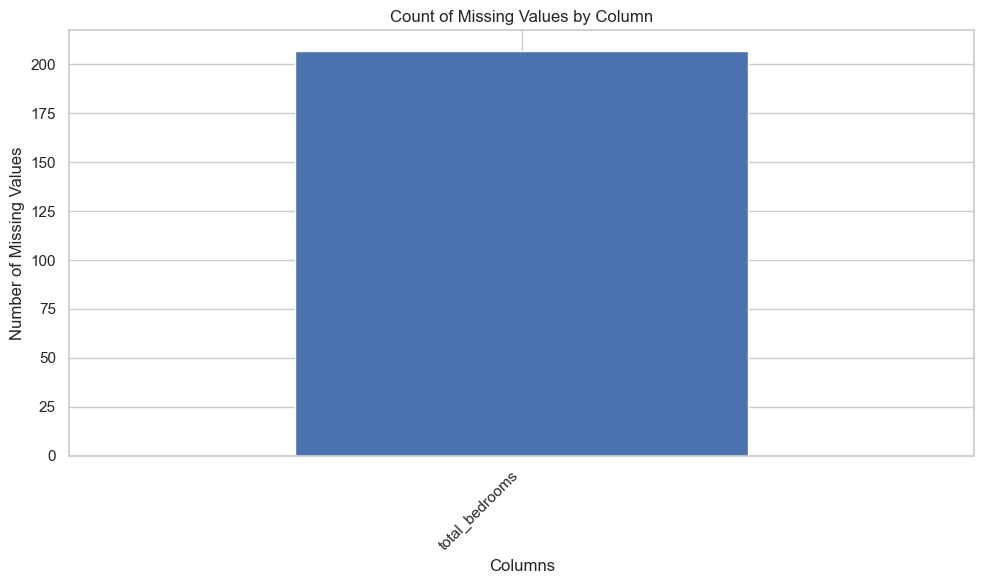

In [91]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Count of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

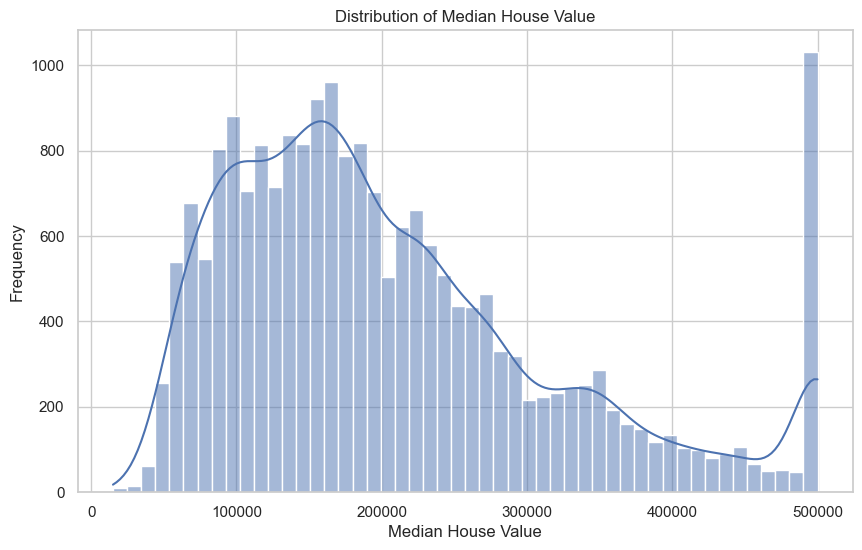

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

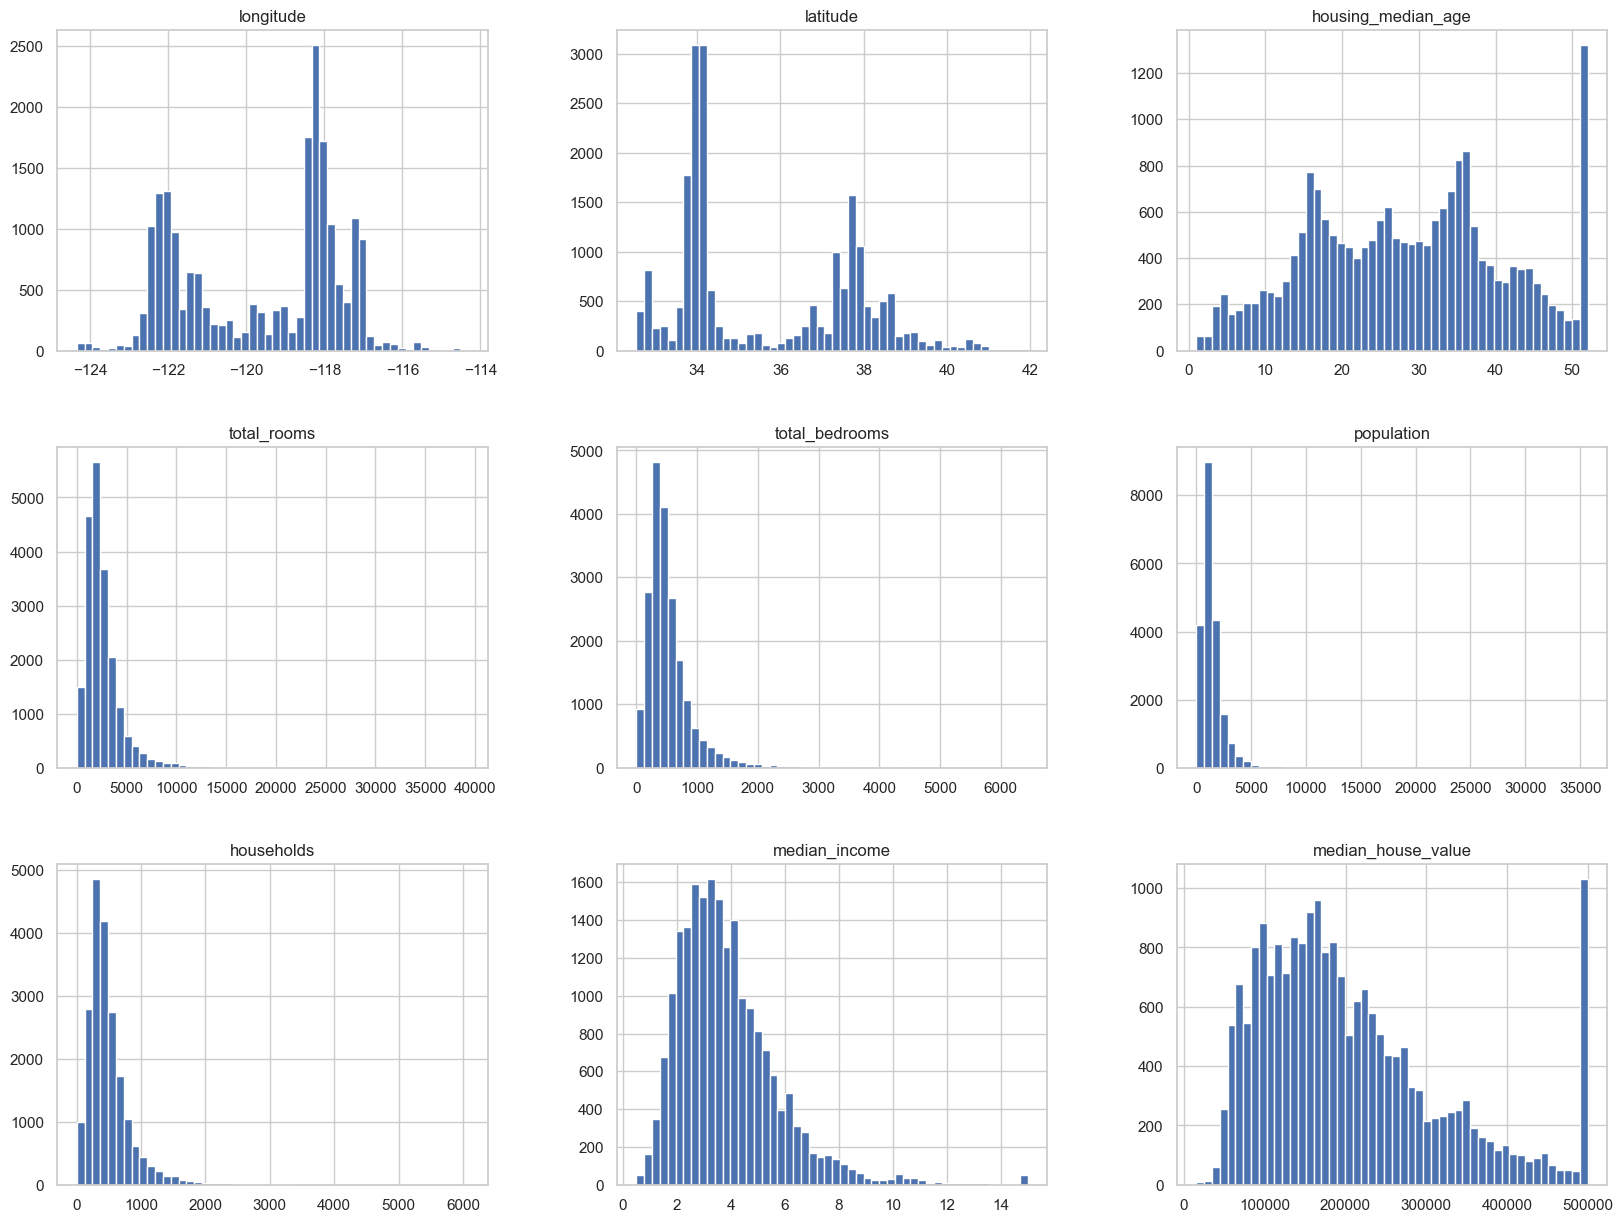

In [93]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Observations:
1-median_income shows a slight right-skew, indicating a concentration of lower-income households with a long tail of higher incomes.

2-Both housing_median_age and median_house_value appear to be capped, suggesting possible upper limits in the data collection or encoding.

3-Several features display noticeable skewness, which may affect model performance and benefit from transformation or scaling.

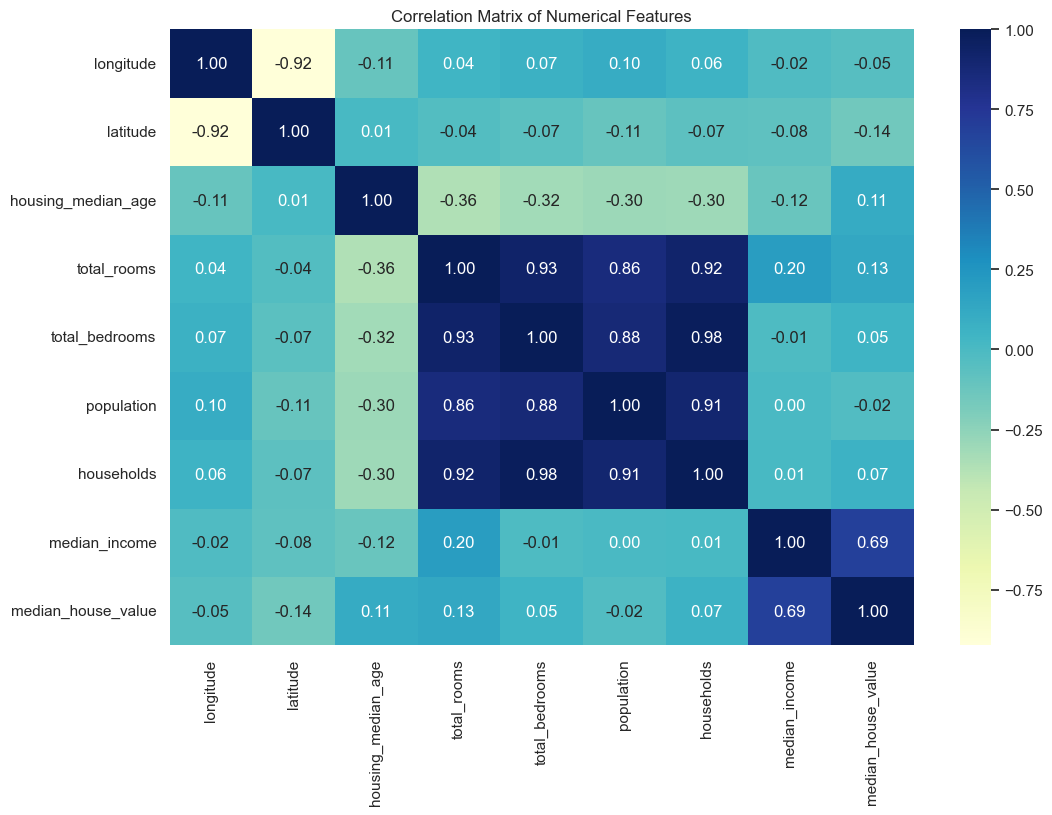

In [94]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Observations:
1-median_income has the strongest positive correlation with median_house_value.

2-total_rooms, households, population are also positively correlated with median_house_value, but to a lesser extent.

3-latitude and longitude show some correlation, likely reflecting location-based pricing.

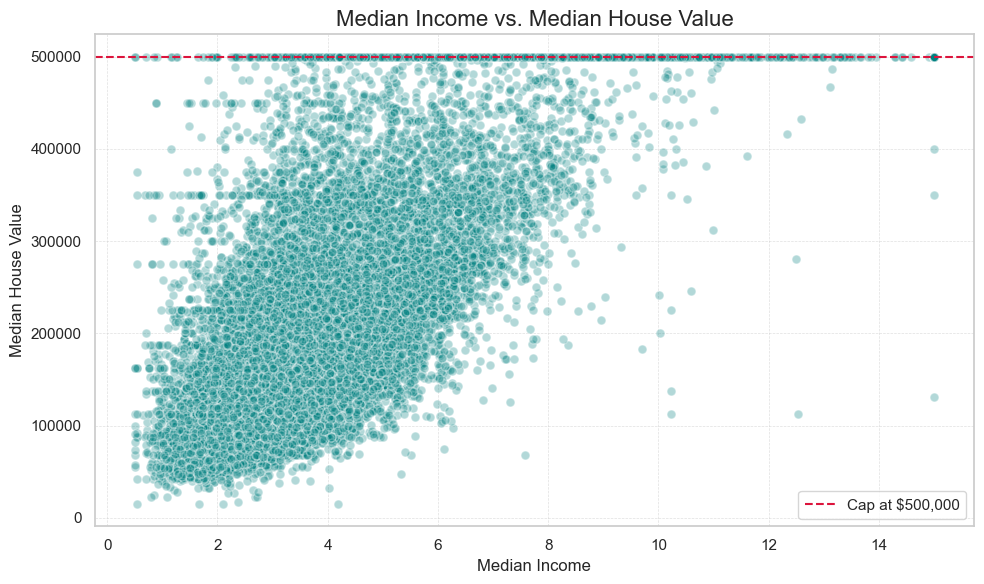

In [95]:
sns.set(style='whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['median_income'],
    df['median_house_value'],
    alpha=0.3,
    color='teal',
    edgecolors='white',
    s=40
)

# Title and axis labels
plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

# Add a horizontal line to show the capping point (optional but insightful)
plt.axhline(y=500000, color='crimson', linestyle='--', linewidth=1.5, label='Cap at $500,000')
plt.legend()

# Improve layout and visuals
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

In [96]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [97]:
from sklearn.model_selection import train_test_split

X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
y_train

17727    227600.0
2057     110400.0
6453     248100.0
4619     305600.0
15266    214600.0
           ...   
11397    273400.0
12081    160800.0
5447     335400.0
866      231200.0
15948    251800.0
Name: median_house_value, Length: 16346, dtype: float64

In [99]:
train_df=X_train.join(y_train)

train_df.shape

(16346, 10)

In [100]:
#correlation calculation
numerical_train_df = train_df.select_dtypes(include=np.number)
numerical_train_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


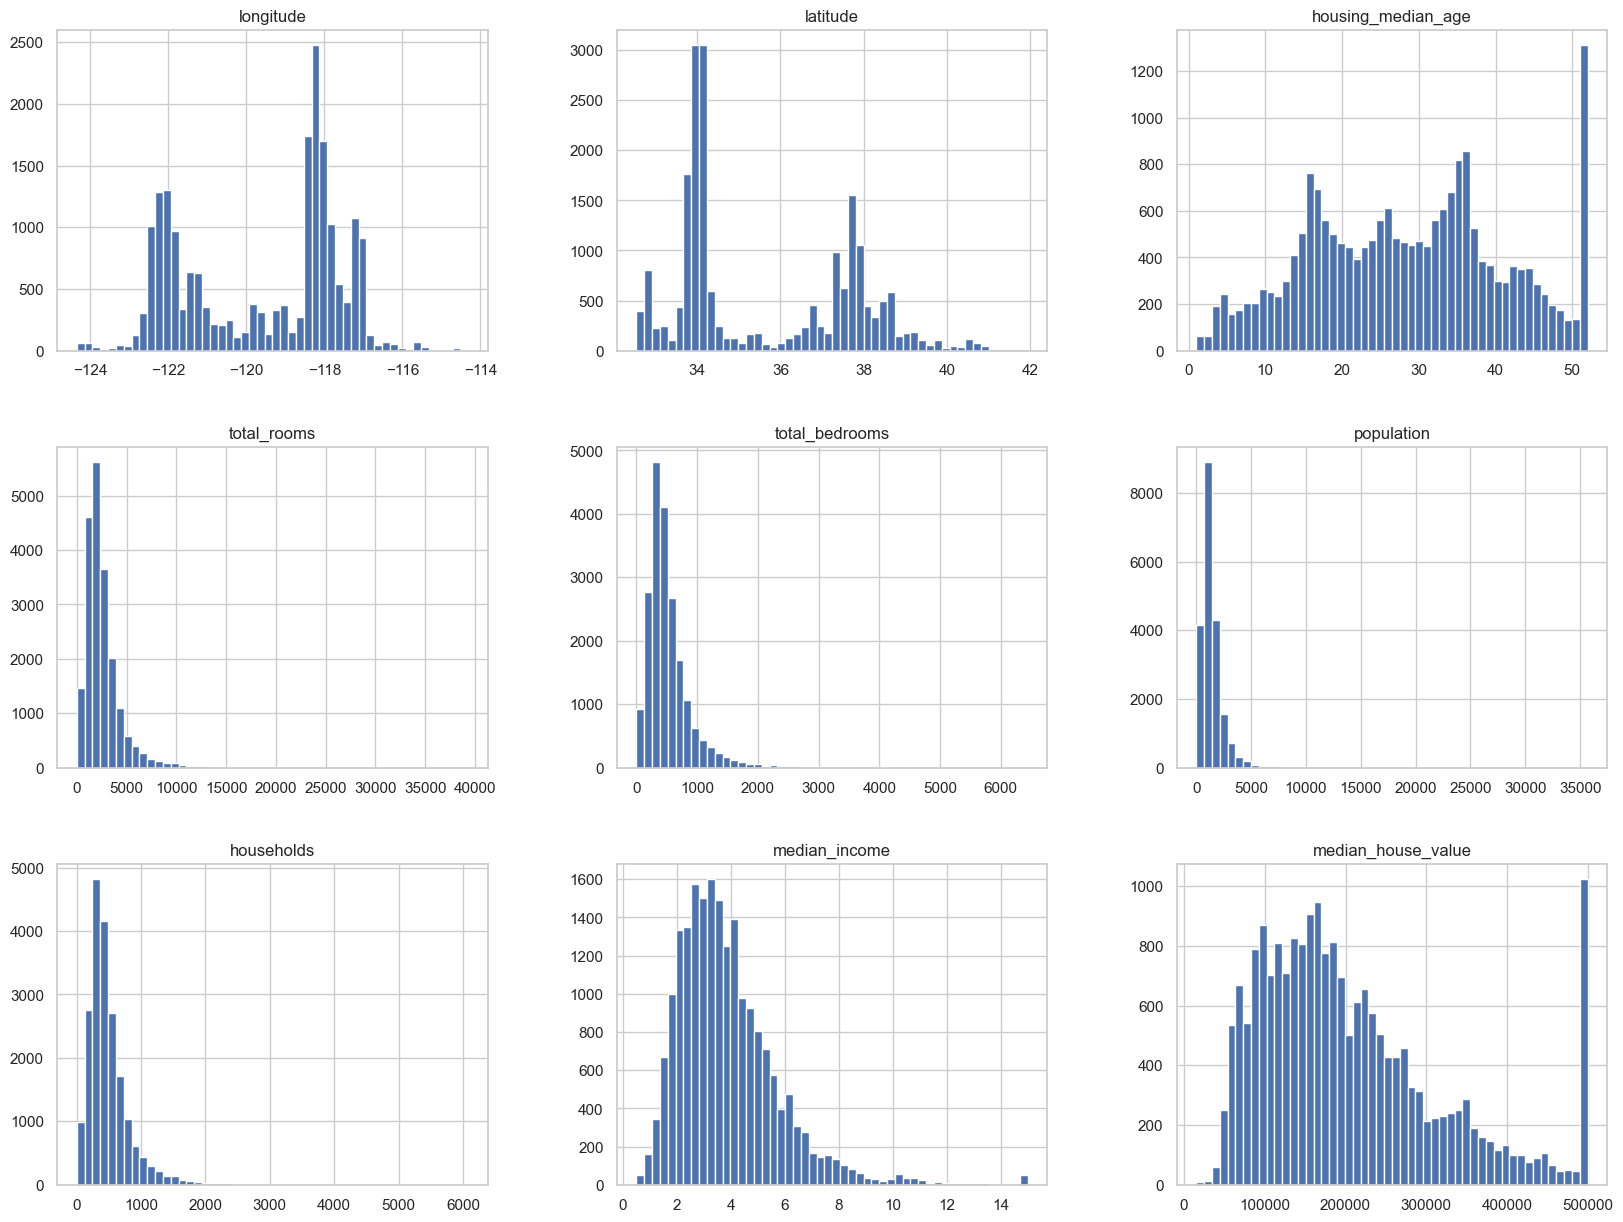

In [101]:
train_df['total_rooms']=np.log(train_df['total_rooms']+1)
train_df['total_bedrooms']=np.log(train_df['total_bedrooms']+1)
train_df['population']=np.log(train_df['population']+1)
train_df['households']=np.log(train_df['households']+1)

df.hist(bins=50, figsize=(20, 15))
plt.show()

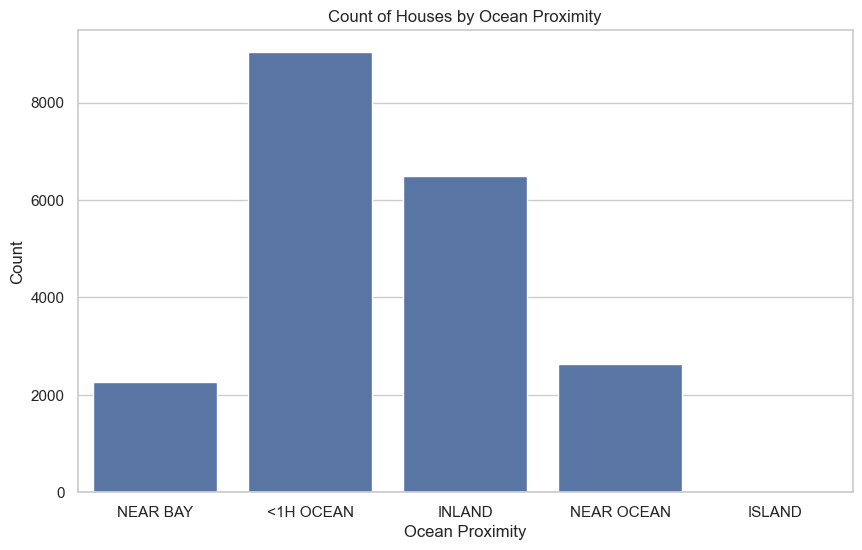

In [102]:
train_df['ocean_proximity'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ocean_proximity')
plt.title('Count of Houses by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

observation:
The majority of houses are located in the regions 'NEAR BAY', 'INLAND', or '<1H OCEAN', indicating a strong concentration of housing near coastal or bay-adjacent areas.

In [103]:
#one hot encoding
train_data = train_df.drop('ocean_proximity', axis=1).join(pd.get_dummies(train_df['ocean_proximity']))

display(train_data.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,False,False,False,False,True


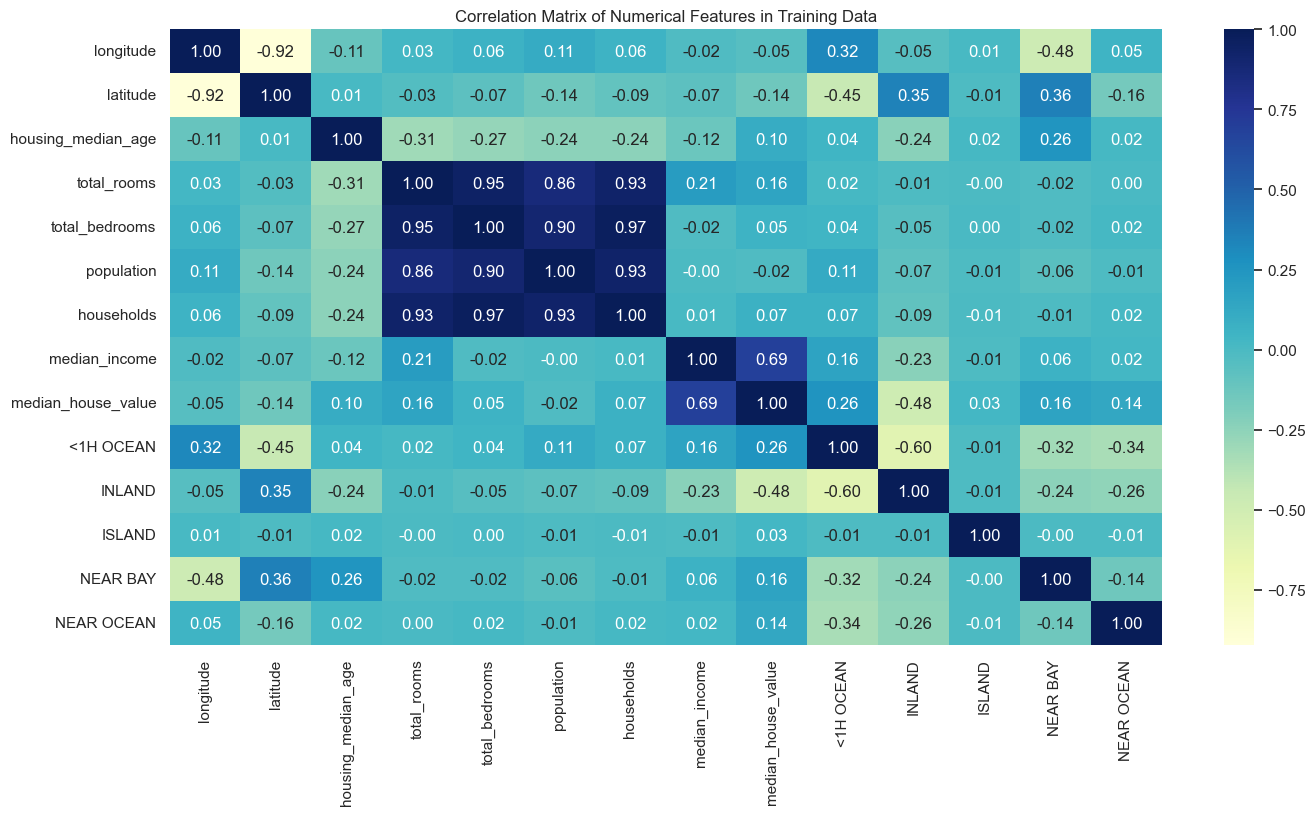

In [104]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in Training Data')
plt.show()

add new features

Bedroom Ratio → Number of bedrooms divided by total rooms.
Shows how rooms are being used and gives an idea of housing quality.

Rooms per Household → Total rooms divided by number of households.
Tells how many rooms each household has on average, showing space and density.

In [105]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']

train_data['room_per_household']=train_data['total_rooms']/train_data['households']

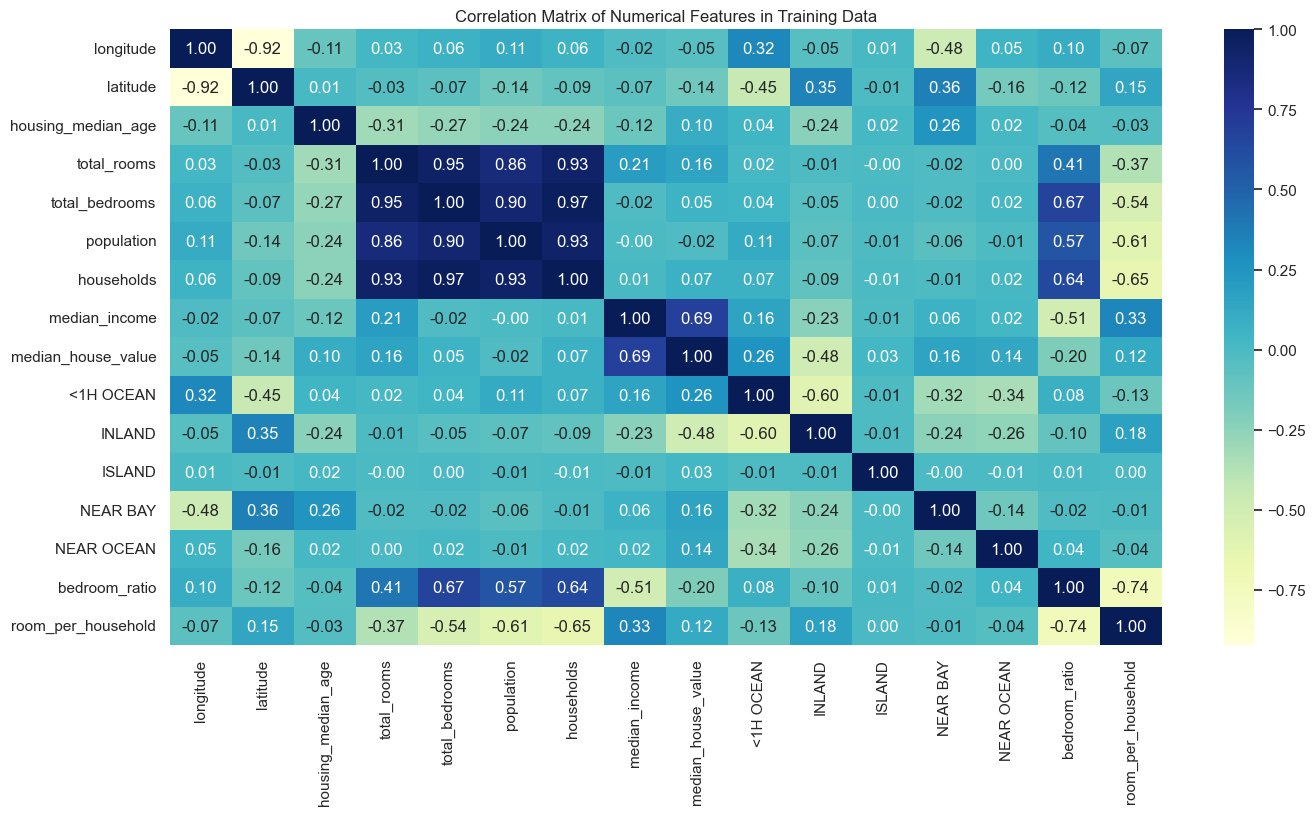

In [106]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features in Training Data')
plt.show()

1- Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train,y_train=train_data.drop('median_house_value',axis=1),train_data['median_house_value']
lr_model=LinearRegression()

In [108]:
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_train)

In [109]:
test_data=X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

In [110]:
test_data=test_data.drop('ocean_proximity', axis=1).join(pd.get_dummies(test_data['ocean_proximity']))
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['room_per_household']=test_data['total_rooms']/test_data['households']
X_test,y_test=test_data.drop('median_house_value',axis=1),test_data['median_house_value']

In [111]:
lr_model.score(X_test,y_test)


0.6687407117584974

In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # This returns MSE
rmse = np.sqrt(mse)  # Take square root to get RMSE

mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", lr_model.score(X_test, y_test))
print("RMSE:", rmse)
print("MAE:", mae)


R² Score: 0.6687407117584974
RMSE: 67305.50240329807
MAE: 48660.75657971971


2- Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.8227319766639459

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

r2_score = rf_model.score(X_test, y_test)
print("R² Score:", r2_score)


R² Score: 0.8203314972692939


In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 32236.471749449473
RMSE: 49361.44086147916


3-Gradient Boosting



In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

predictions = gb_model.predict(X_test)

r2_score = gb_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print("r2_score:", r2_score)
print("MAE:", mae)
print("RMSE:", rmse)


r2_score: 0.7690663889960303
MAE: 38780.020864833314
RMSE: 56196.60915085828


Obseration-
1-Random Forest has the best R² (0.82) and lowest RMSE/MAE, making it the most accurate and robust model for this task.

2-Gradient Boosting is also accurate (R² ~0.77) but can overfit and is sensitive to noise, requiring careful tuning.

3-Linear Regression (R² ~0.67) assumes linearity and performs worst, with highest errors.

Overall, Random Forest balances accuracy, robustness, and ease of use, so it is preferred.

In [117]:
import pickle

# Assuming rf_model is your trained Random Forest model
filename = 'random_forest_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)


In [119]:
print(model.feature_names_in_)


['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income' '<1H OCEAN'
 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN' 'bedroom_ratio'
 'room_per_household']
